In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [2]:
dm = pd.read_csv('train.csv')

In [3]:
dm.shape

(54808, 14)

In [4]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
dm.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [6]:
dm.previous_year_rating.unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [7]:
dm.drop([ 'no_of_trainings', 'awards_won?', 'avg_training_score'], axis='columns', inplace=True)
dm

,employee_id,department,region,education,gender,recruitment_channel,age,previous_year_rating,length_of_service,KPIs_met >80%,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,35,5.0,8,1,0
1,65141,Operations,region_22,Bachelor's,m,other,30,5.0,4,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,34,3.0,7,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,39,1.0,10,0,0
4,48945,Technology,region_26,Bachelor's,m,other,45,3.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,48,3.0,17,0,0
54804,74592,Operations,region_27,Master's & above,f,other,37,2.0,6,0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,27,5.0,3,1,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,29,1.0,2,0,0


In [8]:
dm['gender'] = dm.gender.map({'m': 'Male', 'f': 'Female'})
dm

,employee_id,department,region,education,gender,recruitment_channel,age,previous_year_rating,length_of_service,KPIs_met >80%,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,Female,sourcing,35,5.0,8,1,0
1,65141,Operations,region_22,Bachelor's,Male,other,30,5.0,4,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,Male,sourcing,34,3.0,7,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,Male,other,39,1.0,10,0,0
4,48945,Technology,region_26,Bachelor's,Male,other,45,3.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,Male,sourcing,48,3.0,17,0,0
54804,74592,Operations,region_27,Master's & above,Female,other,37,2.0,6,0,0
54805,13918,Analytics,region_1,Bachelor's,Male,other,27,5.0,3,1,0
54806,13614,Sales & Marketing,region_9,NaN,Male,sourcing,29,1.0,2,0,0


In [9]:
dm.education[dm.education.isna()] =  'Diploma'
dm.previous_year_rating[dm.previous_year_rating.isna()] =  dm.previous_year_rating.median()
dm

<ipython-input-9-5b0724473923>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm.education[dm.education.isna()] =  'Diploma'
<ipython-input-9-5b0724473923>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm.previous_year_rating[dm.previous_year_rating.isna()] =  dm.previous_year_rating.median()


,employee_id,department,region,education,gender,recruitment_channel,age,previous_year_rating,length_of_service,KPIs_met >80%,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,Female,sourcing,35,5.0,8,1,0
1,65141,Operations,region_22,Bachelor's,Male,other,30,5.0,4,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,Male,sourcing,34,3.0,7,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,Male,other,39,1.0,10,0,0
4,48945,Technology,region_26,Bachelor's,Male,other,45,3.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,Male,sourcing,48,3.0,17,0,0
54804,74592,Operations,region_27,Master's & above,Female,other,37,2.0,6,0,0
54805,13918,Analytics,region_1,Bachelor's,Male,other,27,5.0,3,1,0
54806,13614,Sales & Marketing,region_9,Diploma,Male,sourcing,29,1.0,2,0,0


In [10]:
dm.length_of_service = dm.length_of_service.astype(int)
dm.length_of_service[dm.length_of_service>25]= 25


<ipython-input-10-0a6d35c6aba9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm.length_of_service[dm.length_of_service>25]= 25


In [11]:
dm.describe()

,employee_id,age,previous_year_rating,length_of_service,KPIs_met >80%,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,34.803915,3.304481,5.852868,0.351974,0.085170
std,22586.581449,7.660169,1.214770,4.200395,0.477590,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000
25%,19669.750000,29.000000,3.000000,3.000000,0.000000,0.000000
50%,39225.500000,33.000000,3.000000,5.000000,0.000000,0.000000
75%,58730.500000,39.000000,4.000000,7.000000,1.000000,0.000000
max,78298.000000,60.000000,5.000000,25.000000,1.000000,1.000000


In [12]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int32  
 9   KPIs_met >80%         54808 non-null  int64  
 10  is_promoted           54808 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 4.4+ MB


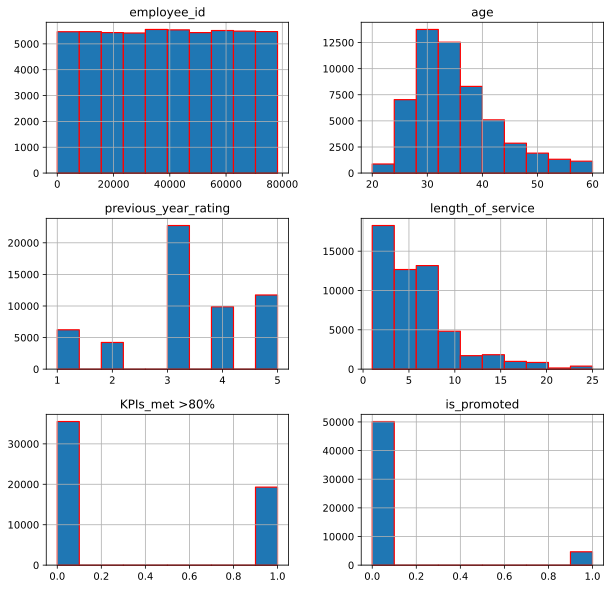

In [13]:
dm.hist(edgecolor='red', linewidth=1.2, figsize=(10, 10));

.

# 1 - How mach the presentage male vs female has been promoted ?

.

In [14]:
avg = dm.groupby(by = ['gender']).mean()
avg

,employee_id,age,previous_year_rating,length_of_service,KPIs_met >80%,is_promoted
gender,,,,,,
Female,39249.336439,34.995647,3.349313,5.979892,0.379414,0.089934
Male,39173.158484,34.722672,3.285484,5.799044,0.340347,0.083151


In [15]:
dm.gender.value_counts()

Male      38496
Female    16312
Name: gender, dtype: int64

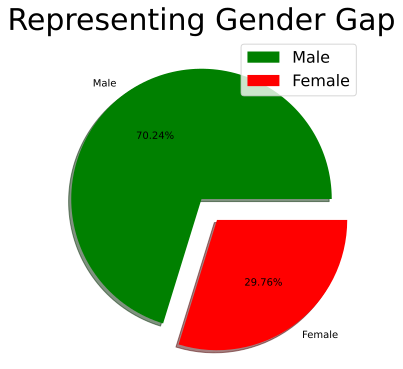

In [16]:
size = [38496, 16312]
labels = "Male", "Female"
colors = ['green', 'red']
explode = [0, 0.2]

plt.subplots(figsize=(6,6))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Representing Gender Gap', fontsize = 30)
plt.legend(fontsize=16)
plt.show()

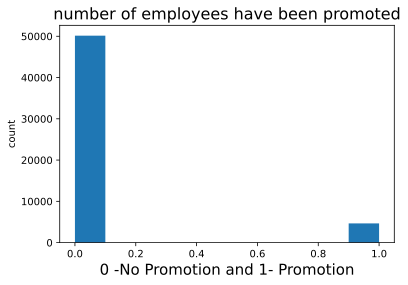

In [17]:
plt.hist(dm['is_promoted'])
plt.title('number of employees have been promoted', fontsize = 16)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 15)
plt.ylabel('count');

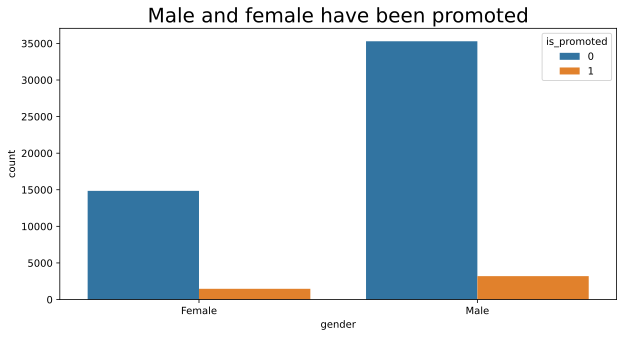

In [18]:
plt.subplots(figsize=(10,5))
plt.title('Male and female have been promoted', fontsize = 20)
sns.countplot(x = 'gender', data = dm, hue = 'is_promoted')
plt.show()

.



# 2 -  Who is the higher performance last year males vs female ?



.

In [19]:
avg_rat = dm.groupby(by = ['gender']).mean()
avg_rat

,employee_id,age,previous_year_rating,length_of_service,KPIs_met >80%,is_promoted
gender,,,,,,
Female,39249.336439,34.995647,3.349313,5.979892,0.379414,0.089934
Male,39173.158484,34.722672,3.285484,5.799044,0.340347,0.083151


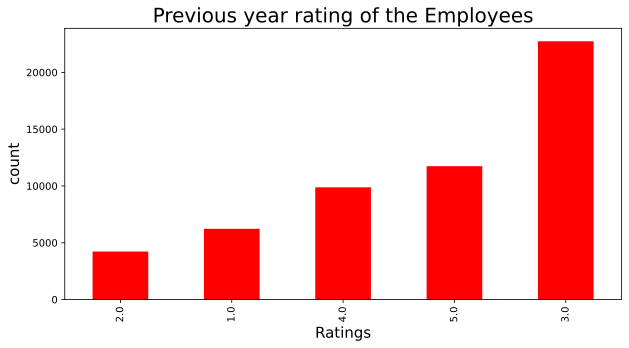

In [20]:
dm['previous_year_rating'].value_counts().sort_values().plot.bar(color = 'red', figsize = (10, 5))
plt.title('Previous year rating of the Employees', fontsize = 20)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

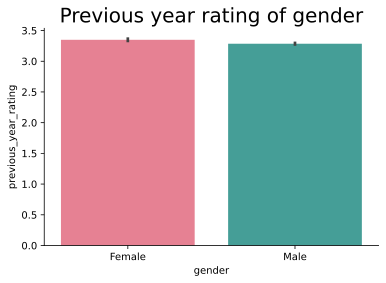

In [21]:
plt.title('Previous year rating of gender', fontsize = 20)
sns.barplot(x = 'gender',y='previous_year_rating',data=dm,palette = sns.color_palette("husl", 2));
sns.despine();

.

# 3 – Which department using higher number of employ ?

.

In [22]:
avg_dept = dm.groupby(by = ['department']).mean()
avg_dept

,employee_id,age,previous_year_rating,length_of_service,KPIs_met >80%,is_promoted
department,,,,,,
Analytics,39107.191891,32.431241,3.508782,4.928064,0.404148,0.095665
Finance,39927.936514,32.058754,3.449921,4.806388,0.414826,0.081230
HR,40036.235318,34.385856,3.433830,5.669975,0.334160,0.056245
Legal,38154.317613,33.832531,3.339750,4.592878,0.333975,0.051011
Operations,39125.010575,36.073669,3.599401,6.404212,0.430737,0.090148
Procurement,39510.594004,35.899972,3.280891,6.314654,0.377557,0.096386
R&D,38242.011011,32.842843,3.514515,4.554555,0.416416,0.069069
Sales & Marketing,39106.111995,34.860629,3.062648,5.899525,0.265083,0.072031
Technology,39012.084477,34.867190,3.146540,5.896750,0.344354,0.107593


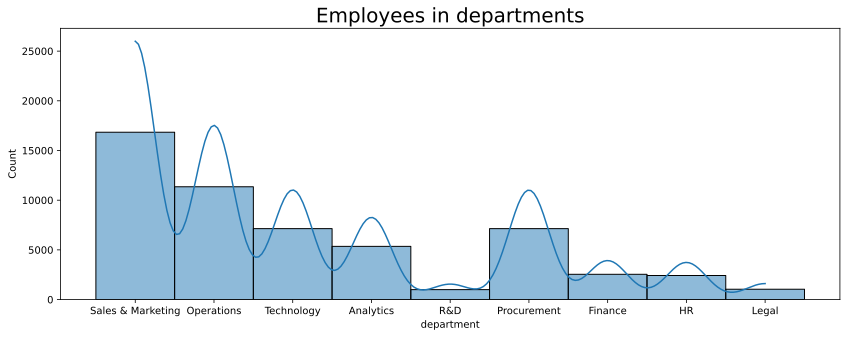

In [23]:
plt.subplots(figsize=(14,5))
plt.title('Employees in departments', fontsize = 20)
sns.histplot(dm['department'],bins=11, kde=True );

.

# 4 - What is the average years of experience for promotion ? 

.

C:\Users\amora\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


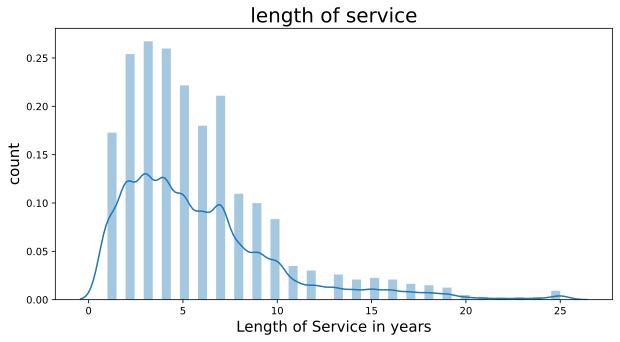

In [25]:
plt.subplots(figsize=(10,5));
los=sns.distplot(dm['length_of_service']);
plt.title('length of service', fontsize = 20);
plt.xlabel('Length of Service in years', fontsize = 15);
plt.ylabel('count', fontsize = 15); 
los;

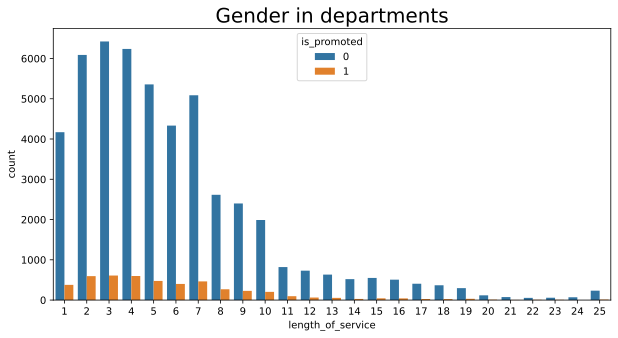

In [29]:
plt.subplots(figsize=(10,5))
sns.countplot(x = 'length_of_service', data = dm, hue = 'is_promoted')
plt.show()

.

# 5 – If KPIs is high, does it affect the promotion ?

.

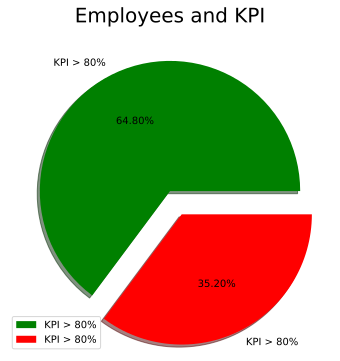

In [26]:
size = [35517, 19291]
labels = "KPI > 80%", "KPI > 80%"
colors = ['green', 'red']
explode = [0, 0.2]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Employees and KPI', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

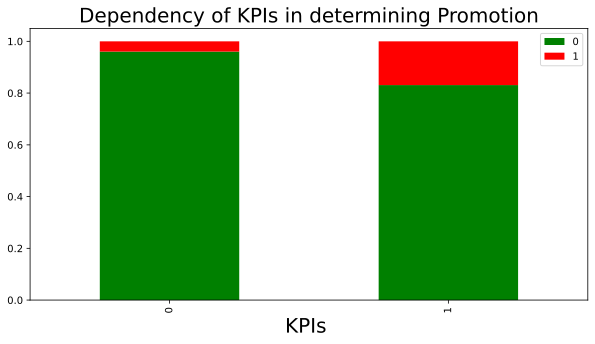

In [27]:
kpi = pd.crosstab(dm['KPIs_met >80%'], dm['is_promoted'])
kpi.div(kpi.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5), color = ['green', 'red'])

plt.title('Dependency of KPIs in determining Promotion', fontsize = 20)
plt.xlabel('KPIs ', fontsize = 20)
plt.legend()
plt.show()

.

# 6 - What is the average age of the employees ?

.

C:\Users\amora\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


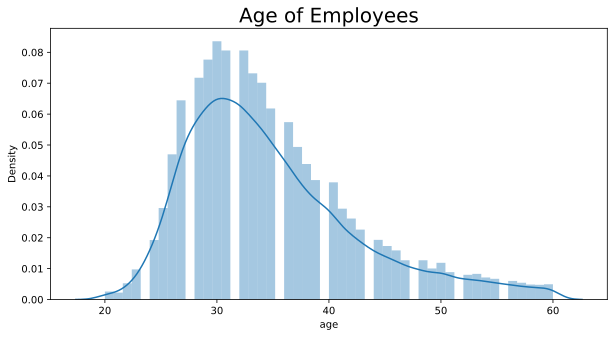

In [28]:
plt.subplots(figsize=(10,5));
sns.distplot(dm['age']);
plt.title('Age of Employees', fontsize = 20);

.

# 7 - Number of men and women with a scientific qualification ?

.

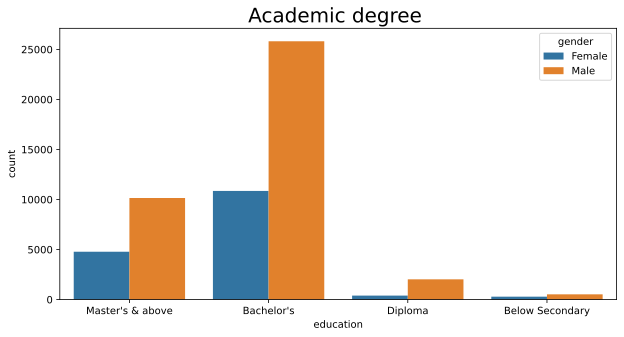

In [32]:
plt.subplots(figsize=(10,5))
sns.countplot(x = 'education', data = dm, hue = 'gender')
plt.title('Academic degree ', fontsize = 20)
plt.show()